In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# %load ../scripts/altair-example.py

# Altair Tooltip Example

An example script that demonstrates how JupyterLab can create interactive altair plots.

In [1]:
import sys

import altair as alt
from vega_datasets import data

In [2]:
cars = data.cars()
LITERS_PER_GALLON = 3.78541

In [3]:
cars['Miles_per_Liter'] = cars['Miles_per_Gallon'] * LITERS_PER_GALLON

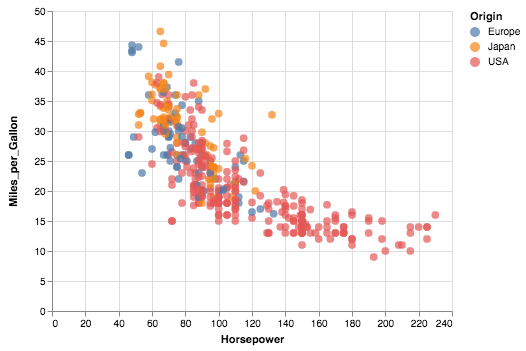

In [4]:
alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

# Python Visualization Landscape

 - matplotlib
 - https://github.com/bloomberg/bqplot
 - bokeh
 - mpld3

In [3]:
from IPython.lib.display import YouTubeVideo

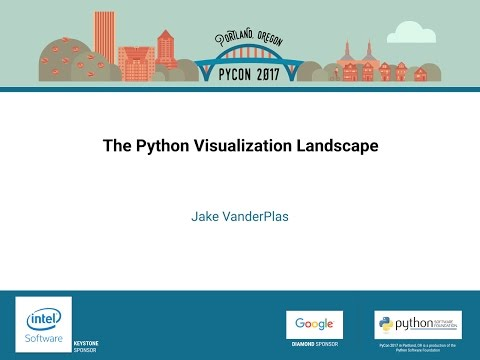

In [4]:
YouTubeVideo("FytuB8nFHPQ", width=400, height=300)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

In [7]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

### Note

Using cleaned data from [Data Cleaning](Data%20Cleaning.ipynb) Notebook. See Notebook for details.

In [8]:
df = pd.read_csv("../data/coal_prod_cleaned.csv")

In [9]:
df.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,103295,18.0,Independent Producer Operator,39175.0,Appalachia Southern,Bibb,Seymour Mine,Alabama,Active,Surface,Hope Coal Company Inc,"P.O. Box 249, Maylene, AL 35114",Mine only,105082.0,NaN,2008
1,103117,19.0,Operating Subsidiary,29926.0,Appalachia Southern,Cullman,"Mine #2, #3, #4",Alabama,"Active, men working, not producing",Surface,Twin Pines Coal Company Inc,"1874 County Road 15, Bremen, AL 35033",Mine only,10419.0,NaN,2008
2,103361,20.0,Operating Subsidiary,42542.0,Appalachia Southern,Cullman,Cold Springs West Mine,Alabama,Active,Surface,Twin Pines Coal Company,"74 Industrial Parkway, Jasper, AL 35502",Mine only,143208.0,NaN,2008
3,100759,395.0,Operating Subsidiary,890710.0,Appalachia Southern,Fayette,North River # 1 Underground Mi,Alabama,Active,Underground,Chevron Mining Inc,"3114 County Road 63 S, Berry, AL 35546",Mine and Preparation Plant,2923261.0,United Mine Workers of America,2008
4,103246,22.0,Independent Producer Operator,55403.0,Appalachia Southern,Franklin,Bear Creek,Alabama,Active,Surface,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",Mine only,183137.0,NaN,2008


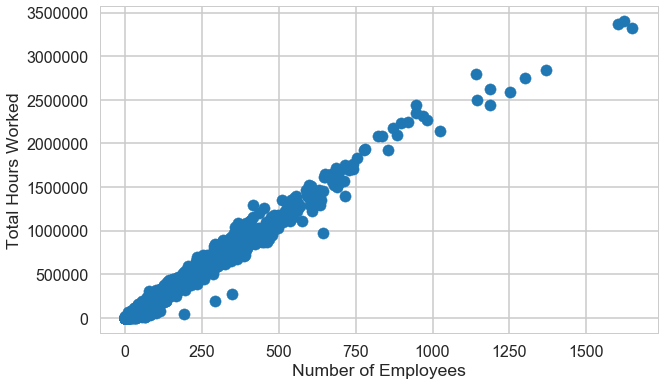

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Average_Employees'], 
            df.Labor_Hours)
ax.set_xlabel("Number of Employees")
ax.set_ylabel("Total Hours Worked");

In [11]:
colors = sns.color_palette(n_colors=df.Year.nunique())

In [12]:
color_dict = {key: value 
              for key, value in zip(sorted(df.Year.unique()), colors)}

In [13]:
color_dict

{2008: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 2009: (1.0, 0.4980392156862745, 0.054901960784313725),
 2010: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 2011: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 2012: (0.5803921568627451, 0.403921568627451, 0.7411764705882353)}

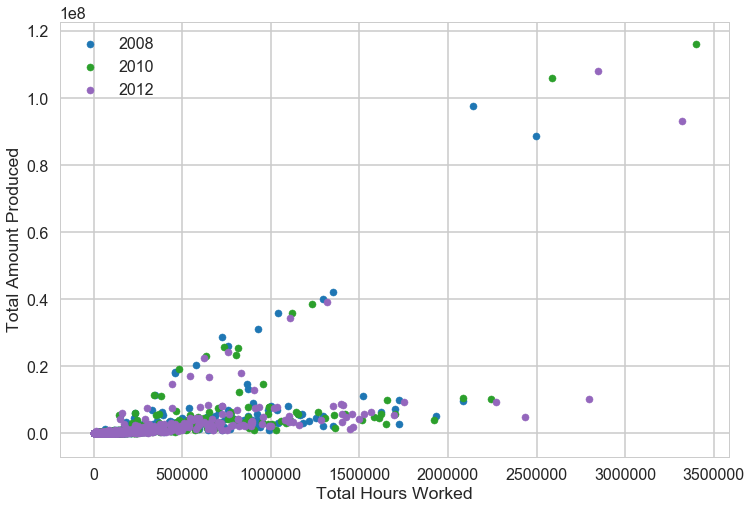

In [14]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
plt.savefig("../ex1.png")

In [15]:
import matplotlib as mpl

In [16]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [17]:
mpl.style.use('seaborn-colorblind')

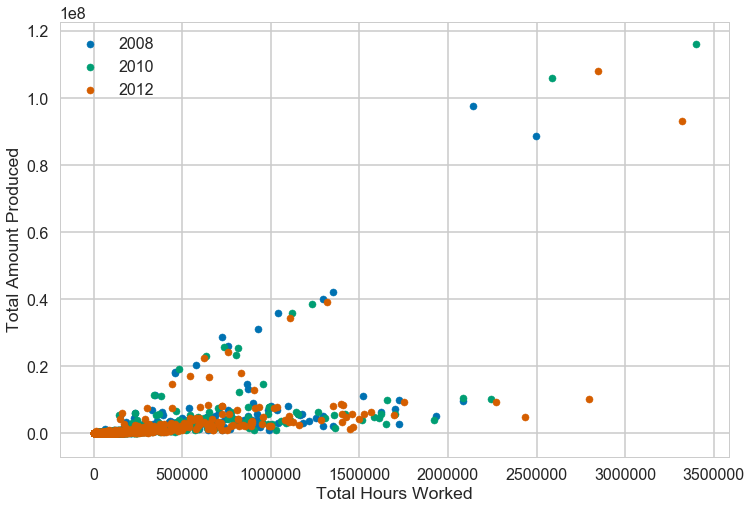

In [18]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
#                 c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend();
# plt.savefig("ex1.png")

In [19]:
df_dict = load_boston()
features = pd.DataFrame(data=df_dict.data, columns = df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target, columns = ['MEDV'])
df = pd.concat([features, target], axis=1)

In [20]:
df['Zone'] = df['ZN'].astype('category')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Zone
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,18.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.0


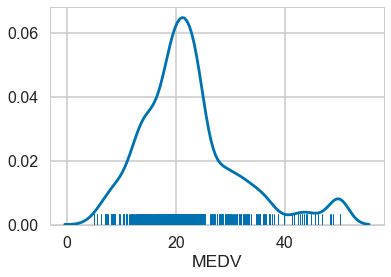

In [104]:
# Target variable
fig, ax = plt.subplots(figsize=(6, 4))
sns.distplot(df.MEDV, ax=ax, rug=True, hist=False);

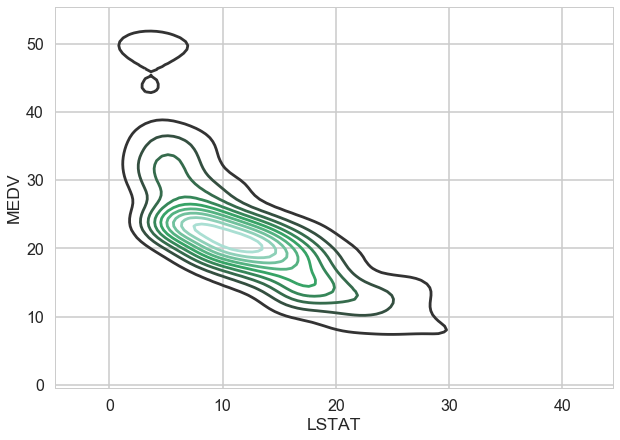

In [106]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.LSTAT,
            df.MEDV,
            ax=ax);

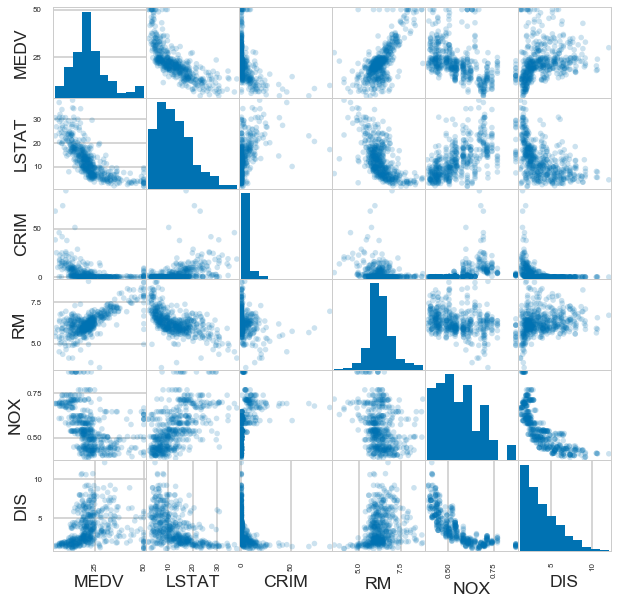

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(df[['MEDV', 'LSTAT', 'CRIM', 'RM', 'NOX', 'DIS']], alpha=0.2, diagonal='hist', ax=ax);

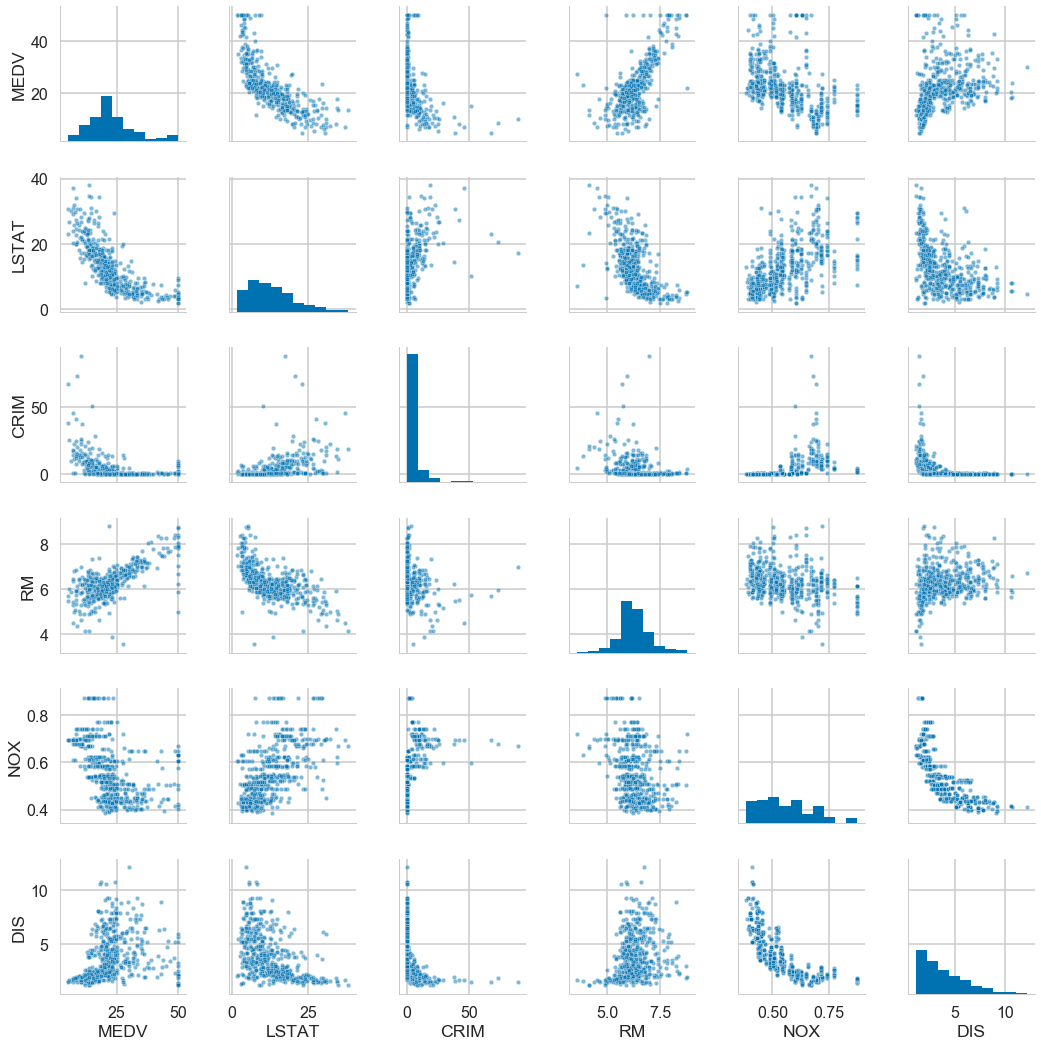

In [108]:
# fig, ax = plt.subplots(figsize=(10, 10))
sns.pairplot(data=df, 
             vars=['MEDV', 'LSTAT', 'CRIM', 'RM', 'NOX', 'DIS'],
             plot_kws={'s':20, 'alpha':0.5},
            );


## Quantile cuts 

In [109]:
players = pd.read_csv("../data/raw_players.csv.gz", compression='gzip')

In [110]:
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25


In [111]:
weight_categories = ["vlow_weight",
                     "low_weight",
                     "mid_weight",
                     "high_weight",
                     "vhigh_weight",
                    ]

players['weightclass'] = pd.qcut(players['weight'],
                                 len(weight_categories),
                                 weight_categories)

In [112]:
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2,weightclass
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,low_weight
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,low_weight
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,vlow_weight
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,mid_weight
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,low_weight


# BQPlot

Examples here are shamelessly stolen from the amazing: https://github.com/maartenbreddels/jupytercon-2017/blob/master/jupytercon2017-widgets.ipynb

In [113]:
from IPython.display import YouTubeVideo

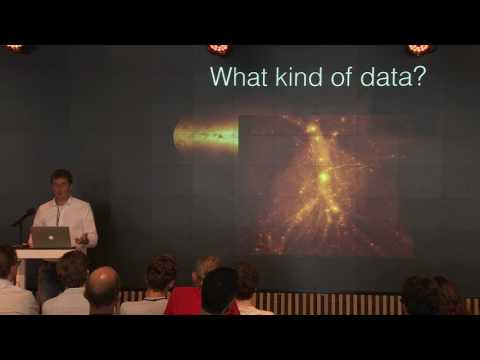

In [114]:
YouTubeVideo("uHPcshgTotE", width=560, height=315)

In [115]:
# mixed feelings about this import
import bqplot.pyplot as plt
import numpy as np

In [116]:
x = np.linspace(0, 2, 50)
y = x**2

In [117]:
fig = plt.figure()
scatter = plt.scatter(x, y)
plt.show()

VBox(children=(Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['steelblue'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ]), y=array([0.00000000e+00, 1.66597251e-03, 6.66389005e-03, 1.49937526e-02,
       2.66555602e-02, 4.16493128e-02, 5.99750104e-02, 8.16326531e-02,
       1.06622241e-01, 1.34943773e-01, 1.66597251e-01, 2.01582674e-01,
       2.39900042e-01, 2.81549354e-01, 3.26530612e-01, 3.74843815e-01,
       4.26488963e-01, 4.81466056e-01, 5.39775094e-01, 6.01416077e-01,
       6.66389005e-01, 7.34693878e-01, 8.06330696e-01, 8.81299459e-01,
       9.59600167e-01, 1.04123282e+00, 1.12619742e+00, 1.21449396e+00,
       1.30612245e+00, 1.40108288e+00, 1.49937526e+00, 1.60099958e+00,
       1.70595585e+00, 1.81424406e+00, 1.92586422e+00, 2.04081633e+00,
       2.15910037e+00, 2.28071637e+00, 2.40566431e+00, 2.53394419e+00,
       2.66555602e+00, 2.80049979e+00, 2.93877551e+00, 3.08038317e+00,
       3.22532278e+00, 3.37359434e+00, 3.52519783e+00, 3.68013328e+00,
       3.83840067e+00, 4.00000000e+00]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0)), Toolbar(figure=Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['steelblue'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip_style={'opacity': 0.9}, x=array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ]), y=array([0.00000000e+00, 1.66597251e-03, 6.66389005e-03, 1.49937526e-02,
       2.66555602e-02, 4.16493128e-02, 5.99750104e-02, 8.16326531e-02,
       1.06622241e-01, 1.34943773e-01, 1.66597251e-01, 2.01582674e-01,
       2.39900042e-01, 2.81549354e-01, 3.26530612e-01, 3.74843815e-01,
       4.26488963e-01, 4.81466056e-01, 5.397

In [118]:
fig.animation_duration = 500
scatter.y = x**.5

In [119]:
scatter.selected_style = {'stroke':'red', 'fill': 'orange'}
plt.brush_selector();

In [120]:
scatter.selected

[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

In [121]:
scatter.selected = [1,2,10,40]

## ipyvolume

In [122]:
import ipyvolume as ipv

In [123]:
N = 1000
x, y, z = np.random.random((3, N))

In [124]:
fig = ipv.figure()
scatter = ipv.scatter(x, y, z, marker='box')
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', dtype='<U5'), geo='box', size=array(2), size_selected=array(2.6), x=array([9.75614085e-01, 6.56776186e-01, 5.80808943e-01, 4.24299935e-01,
       5.38225168e-01, 7.09062747e-01, 5.26030279e-01, 6.10454132e-02,
       2.83808460e-01, 9.76067268e-01, 2.65076639e-01, 2.99611397e-01,
       8.34113505e-01, 1.21770670e-01, 8.36004510e-01, 8.78994522e-01,
       7.61957684e-01, 2.67953991e-01, 7.62172016e-01, 8.47274110e-01,
       9.27321132e-01, 9.24886142e-01, 2.75573421e-01, 1.28657533e-02,
       4.54201855e-01, 9.68147698e-02, 6.89983714e-01, 8.02583888e-01,
       9.78143897e-01, 8.45518298e-01, 3.82113872e-01, 1.08945940e-01,
       5.40571894e-01, 8.95753751e-01, 6.36452913e-01, 1.29711495e-01,
       5.31902855e-01, 8.30136145e-01, 1.01928641e-01, 3.81846390e-01,
       6.53432006e-01, 4.26699506e-01, 2.75858746e-01, 4.02058792e-01,
       7.64772632e-02, 3.13575838e-01, 8.96241992e-01, 5.55809771e-01,
       8.18271785e-01, 6.11374916e-01, 6.56872953e-01, 7.93381903e-01,
       2.90649760e-01, 7.59819877e-01, 8.72367192e-01, 6.62940888e-01,
       1.19437293e-01, 6.58632573e-01, 2.58486989e-01, 7.06430531e-01,
       8.78454063e-01, 8.63277789e-01, 2.74497212e-01, 2.21018238e-01,
       4.81948604e-01, 6.61984246e-01, 5.05851867e-01, 6.94953665e-01,
       9.72871545e-01, 1.02656209e-01, 8.77016546e-01, 9.97586445e-01,
       4.98706870e-01, 3.93121772e-01, 2.37719334e-02, 8.18286745e-01,
       1.71881798e-01, 3.43341523e-01, 1.63210157e-01, 8.61414431e-01,
       8.90767708e-01, 7.52064283e-01, 3.88253413e-02, 5.32552263e-01,
       7.08397979e-01, 8.58725980e-01, 9.77060341e-01, 4.49584899e-01,
       1.62506151e-01, 5.65049611e-01, 4.03643471e-01, 2.98772314e-01,
       1.06771221e-01, 6.71357117e-01, 5.67327411e-01, 3.09752645e-01,
       9.01280588e-01, 4.12242663e-01, 4.04981901e-02, 1.05150122e-01,
       4.69131474e-01, 2.36425437e-01, 6.87567202e-01, 8.72954772e-01,
       3.09343172e-01, 1.70595703e-01, 6.97712768e-01, 5.18282214e-01,
       7.53560735e-01, 5.27425554e-01, 1.67439069e-01, 5.41818421e-01,
       5.34600852e-01, 2.78774621e-01, 2.82255327e-01, 8.99068879e-01,
       3.28667201e-01, 2.98658332e-01, 1.87575579e-01, 5.55158724e-02,
       9.61662026e-01, 5.52559978e-01, 7.20929863e-02, 4.87308256e-01,
       2.74103267e-01, 5.10746890e-01, 1.43850220e-01, 3.63953106e-01,
       2.96096255e-01, 7.10851886e-01, 9.26577775e-02, 3.21704253e-01,
       2.51115620e-01, 4.01645730e-01, 2.23060365e-01, 9.26731517e-01,
       2.36083961e-01, 1.50797441e-01, 8.94771902e-01, 8.69234264e-01,
       5.99057892e-01, 4.22462978e-01, 4.05400287e-01, 9.45901155e-01,
       7.58414229e-01, 4.09527960e-01, 2.71051687e-01, 3.47729340e-01,
       6.92601466e-01, 6.82876462e-01, 7.35842322e-01, 7.69020118e-01,
       7.07437060e-01, 5.99904123e-01, 9.55686799e-01, 3.86735183e-02,
       4.07658725e-01, 9.00049250e-01, 5.72154018e-01, 7.13480540e-01,
       4.17121947e-01, 3.95569876e-01, 8.36135416e-01, 1.48290934e-01,
       3.71380129e-01, 7.95677651e-01, 1.28741579e-01, 2.42204712e-01,
       3.50581113e-01, 4.35988840e-01, 3.37314719e-01, 2.13560037e-01,
       8.85854026e-01, 4.70155006e-01, 6.96234572e-01, 4.40333052e-01,
       6.40085435e-01, 8.23079312e-01, 2.16649667e-01, 4.98337677e-01,
       4.86827868e-01, 7.41012768e-01, 3.26935826e-01, 9.17983775e-01,
       7.52391688e-01, 5.68646578e-01, 3.38334991e-02, 5.08227347e-01,
       3.21922849e-01, 7.59787624e-01, 7.73411504e-01, 1.49433451e-01,
       5.40491375e-01, 2.47361103e-01, 6.52265110e-01, 7.08335566e-02,
       2.18924385e-01, 2.97330305e-01, 4.46659223e-01, 9.96200477e-01,
       8.87988225e-02, 8.38829648e-01, 3.60193397e-01, 9.26247479e-01,
   

In [125]:
scatter.x = scatter.x + 0.5

In [130]:
scatter.x = x

In [126]:
scatter.color = "green"
scatter.size = 5

In [127]:
scatter.color = np.random.random((N,3))

In [128]:
scatter.size = 2

In [129]:
ex = ipv.datasets.animated_stream.fetch().data

In [131]:
ex.shape

(6, 200, 1250)

In [132]:
ex[:, ::, ::4].shape

(6, 200, 313)

In [133]:
ipv.figure()
ipv.style.use('dark')
quiver = ipv.quiver(*ipv.datasets.animated_stream.fetch().data[:,::,::4], size=5)
ipv.animation_control(quiver, interval=200)
ipv.show()
ipv.style.use('light')

VBox(children=(Figure(animation=200.0, animation_exponent=1.0, camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', dtype='<U5'), geo='arrow', size_selected=array(26.), vx=array([[-1.31736946e+00,  4.25673902e-01, -3.68523225e-02, ...,
         3.17795753e+01, -1.79909782e+01, -1.06947403e+01],
       [-7.85798035e+01, -5.60227814e+01, -6.46254578e+01, ...,
        -2.41547432e+01, -8.81983719e+01, -7.27110443e+01],
       [-1.42756561e+02, -1.17299698e+02, -1.25198883e+02, ...,
        -9.29719238e+01, -1.51934021e+02, -1.19095551e+02],
       ...,
       [-1.61835052e+02, -1.58434540e+02, -8.81332550e+01, ...,
         1.33176529e+02, -4.33596611e+01, -1.77424698e+02],
       [-1.33276291e+02, -1.92785782e+02, -1.12307861e+02, ...,
         8.45897064e+01, -8.12866211e+01, -1.64591522e+02],
       [-9.98619843e+01, -2.17321259e+02, -1.31060486e+02, ...,
         3.33404617e+01, -9.89405060e+01, -1.45613098e+02]]), vy=array([[ 79.2004471 ,  74.0441055 ,  84.8730469 , ...,  93.9265442 ,
         44.1673889 ,  68.584671  ],
       [ 89.2843323 ,  44.2301178 ,  68.7155609 , ...,  74.320343  ,
         57.4617233 ,  39.1749001 ],
       [ 68.574234  ,  29.9436836 ,  34.1692009 , ...,  48.3454781 ,
         63.5059509 ,  26.9425354 ],
       ...,
       [ 34.2365265 ,  41.2811089 , 108.539574  , ...,   8.15382576,
        247.678314  ,  38.7953262 ],
       [  4.41265392,  24.8659954 ,  94.1539307 , ...,  28.0570583 ,
        195.220154  ,  15.3608322 ],
       [-23.6301079 ,   2.46200228,  73.2015533 , ...,  45.3641281 ,
        115.905106  ,  -4.66734886]]), vz=array([[ 131.581329  ,  166.65126   ,  145.194016  , ...,  181.853256  ,
         145.465988  ,  145.596848  ],
       [ 103.417038  ,  151.36676   ,  156.087067  , ...,  145.85556   ,
         146.37915   ,  113.244835  ],
       [ 102.786118  ,  109.425354  ,  142.1828    , ...,  102.978531  ,
         122.243172  ,  103.905167  ],
       ...,
       [  48.4021683 ,  -51.5284424 ,  -32.165329  , ..., -100.564499  ,
         -15.035985  ,  -91.4700623 ],
       [  81.8117752 ,   -2.61627531,   14.052949  , ..., -123.32724   ,
        -100.698868  ,  -41.7997627 ],
       [ 108.97332   ,   57.4774284 ,   62.1432114 , ..., -138.098236  ,
        -158.771301  ,    1.05042124]]), x=array([[ 15.713542  ,  15.1947222 ,  15.3729095 , ...,  14.7083101 ,
         15.5524664 ,  15.4734497 ],
       [ 14.8871861 ,  14.6114721 ,  14.7050743 , ...,  14.8084688 ,
         14.4589787 ,  14.5873384 ],
       [ 12.645752  ,  12.9243288 ,  12.8084984 , ...,  13.6488533 ,
         12.0474396 ,  12.6789751 ],
       ...,
       [ -8.97028732,  11.0045128 ,   9.39290142, ...,  14.6164303 ,
          4.11075115,  -2.44619107],
       [-11.9300337 ,   7.47973299,   7.37968111, ...,  16.798233  ,
          2.82909846,  -5.87905741],
       [-14.2692108 ,   3.3574295 ,   4.93648243, ...,  17.9824753 ,
          0.9952367 ,  -8.98945141]]), y=array([[-0.40137351,  0.49408507,  0.08535366, ...,  0.20105109,
        -0.89632875,  0.60363787],
       [ 1.36342824,  1.72629094,  1.6965729 , ...,  1.9643383 ,
         0.15709364,  1.73176348],
       [ 2.97800708,  2.3748076 ,  2.72993898, ...,  3.18175936,
         1.37927544,  2.30113339],
       ...,
       [10.7122145 ,  4.05997944,  3.97947216, ..., -6.6010685 ,
         2.65900612,  7.22807646],
       [11.0953865 ,  4.73007917,  6.01671648, ..., -6.23415041,
         7.15112019,  7.76295853],
       [10.9005804 ,  5.0148778 ,  7.7020998 , ..., -5.49601269,
        10.2921953 ,  7.86510754]]), z=array([[  0.56143552,  -0.14026628,  -0.42148718, ...,   0.27454034,
         -0.8576954 ,   0.5116443 ],
       [  2.92711878,   3.17028594,   2.71553016, ...,   3.67391515,
          2.21440506,   3.16416025],
       [  5.0

In [134]:
ipv.style.use('light')

In [135]:
quiver.geo = "cat"

In [136]:
N = 1000*1000
x, y, z = np.random.random((3, N)).astype('f4')

In [137]:
ipv.figure()
s = ipv.scatter(x, y, z, size=0.2)
ipv.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', dtype='<U5'), size=array(0.2), size_selected=array(2.6), x=array([0.6504848 , 0.87947106, 0.01756533, ..., 0.41004026, 0.303799  ,
       0.01171705], dtype=float32), y=array([0.07698023, 0.44611254, 0.38869616, ..., 0.3804044 , 0.10444013,
       0.5882147 ], dtype=float32), z=array([0.42174485, 0.40289024, 0.04477653, ..., 0.90173167, 0.17154513,
       0.21462466], dtype=float32))], style={'axes': {'visible': True, 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'color': 'black'}, 'box': {'visible': True}, 'background-color': 'white'}, tf=None, width=400, xlim=[0.0, 1.0], ylim=[0.0, 1.0], zlim=[0.0, 1.0]),))

In [138]:
ipv.save("3d-example-plot.html")

In [139]:
!open 3d-example-plot.html